In [15]:
import math

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# 定数定義
IMAGE_ROOT = './images'
TRAIN_ROOT = f'{IMAGE_ROOT}/train'
VALID_ROOT = f'{IMAGE_ROOT}/valid'

IMAGE_SIZE = 256

In [46]:
# 前処理の定義
valid_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

train_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(),  # ランダムに左右反転
    transforms.ColorJitter(),  # ランダムに画像の色調を変更
    transforms.RandomRotation(10),  #  ランダムに画像回転(±10度)
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

# 画像の読み込み
train_datasets = datasets.ImageFolder(TRAIN_ROOT, transform=train_transform)
valid_datasets = datasets.ImageFolder(VALID_ROOT, transform=valid_transform)

print('----- train -----')
print('image qty:', len(train_datasets))
print('classes  :', train_datasets.classes)

print('\n----- validation -----')
print('image qty:', len(valid_datasets))
print('classes  :', valid_datasets.classes)

----- train -----
image qty: 500
classes  : ['CHAEYOUNG', 'DAHYUN', 'JEONGYEON', 'JIHYO', 'MINA', 'MOMO', 'NAYEON', 'SANA', 'TZUYU']

----- validation -----
image qty: 126
classes  : ['CHAEYOUNG', 'DAHYUN', 'JEONGYEON', 'JIHYO', 'MINA', 'MOMO', 'NAYEON', 'SANA', 'TZUYU']


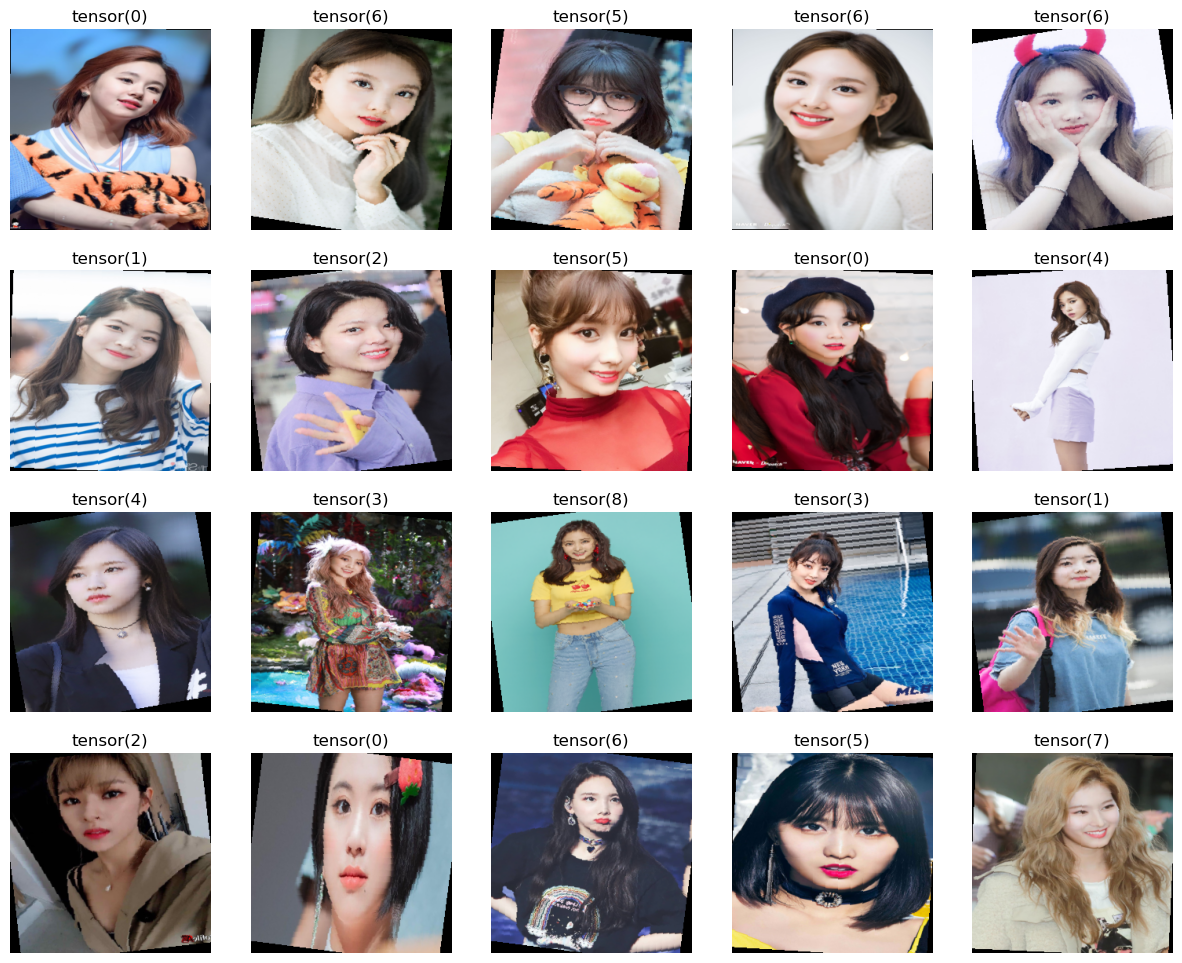

In [58]:
# データローダーの生成
train_loader = DataLoader(train_datasets, shuffle=True)
valid_loader = DataLoader(valid_datasets, shuffle=False)
data_iter = iter(train_loader)

# 画像表示領域の設定
image_num = len(data_iter)
image_num = 20
ncols = 5
nrows = image_num // ncols if image_num % ncols == 0 else image_num // ncols + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3*nrows))
axes = axes.flatten()
plt.axis('off')

# 画像表示
for idx, (imgs, labels) in enumerate(data_iter):
    if idx >= image_num:
        break
    
    img = imgs[0]
    img_permute = img.permute(1, 2, 0)
    img_permute = 0.5 * img_permute + 0.5
    img_permute = np.clip(img_permute, 0, 1)
    
    label = labels[0]
    
    ax = axes[idx]
    ax.axis('off')
    ax.set_title(label)
    ax.imshow(img_permute)
